In [10]:
from PIL import Image
import numpy as np

from kvrrj.viz.image import extract_color_coordinates, point_group

img = Image.new("RGBA", (10, 10), color="white")
img.putpixel((5, 5), (255, 0, 0, 255))
img.putpixel((6, 6), (255, 0, 0, 255))

# coords = extract_color_coordinates(
#     img, (1, 0, 0, 1), proximity_threshold=1, color_threshold=0
# )
# coords

point_group([[5, 5], [5, 5]], threshold=1)

np.array([[5, 5], [5, 5], [5, 5]]).shape[1]

Clustering points ...:   0%|          | 0/2 [00:00<?, ?it/s]


ValueError: Expected 2D array, got 1D array instead:
array=[5. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
from PIL import Image
import numpy as np
from kvrrj.viz.image import point_group

# create a white sqaure image
img = Image.new("RGBA", (10, 10), color="white")
# add a red pixel
img.putpixel((5, 3), (255, 0, 0, 255))
# add a blue pixel
img.putpixel((8, 2), (0, 0, 255, 255))
# add a green-ish pixel
img.putpixel((6, 3), (0, 245, 0, 255))
# add a green pixel
img.putpixel((2, 7), (0, 255, 0, 255))

# extract the coordinates of pixels within a threshold of the color (0, 0, 255, 255), without using a predefined function
c = (0, 255, 0, 255)
color_threshold = 11
coords = []
for x in range(img.width):
    for y in range(img.height):
        color = img.getpixel((x, y))
        if all(np.isclose(color, c, atol=color_threshold)):
            coords.append((x, y))

# group the coordinates by proximity
proximity_threshold = 2
groups = point_group(coords, threshold=proximity_threshold)
centroids = np.mean(groups, axis=1)

xs, ys = centroids.T
[[px[0], img.height - px[1]] for px in centroids]
# centroids

[[np.float64(2.0), np.float64(3.0)], [np.float64(6.0), np.float64(7.0)]]

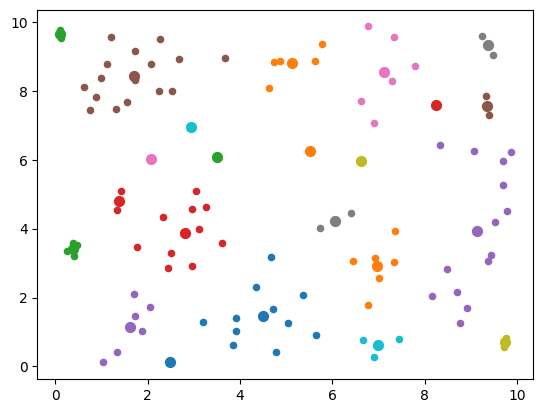

In [ ]:
from collections import defaultdict

from sklearn.neighbors import KDTree
from tqdm import tqdm




# create a set of 1000 random points, between 0 and 10
points = np.random.rand(100, 2) * 10
groups = point_group(points, threshold=1)
centroids = [np.mean(grp, axis=0) for grp in groups]

import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1], s=2)
# plot each group with a different color
for n, group in enumerate(groups):
    e = plt.scatter(*np.array(group).T, s=20)
    # get color of the group
    color = e.get_facecolor()
    # plot the centroid of the group
    plt.scatter(*centroids[n], s=50, color=color)